### Aim of this notebook is to explain key features of the model and why we are making specific predictions

#### Import data and modules

In [40]:
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('../data/df_prepped.csv')
pd.set_option('display.max_columns', None)

print('df.shape:', df.shape)
df.head()

df.shape: (32330, 50)


,Year,Countries,Sand_1,Sand_2,Sand_3,Sand_4,Sand_5,Sand_6,Sand_7,Clay_1,Clay_2,Clay_3,Clay_4,Clay_5,Clay_6,Clay_7,OC_1,OC_2,OC_3,OC_4,OC_5,OC_6,OC_7,PAW_1,PAW_2,PAW_3,PAW_4,PAW_5,PAW_6,PAW_7,Y_maize_major,Farm,Sow_Maize_month_int,Harvest_Maize_month_int,sow_to_harvest_months,maize_lag-1,pcp_mean_lag-1,tmax_mean_lag-1,tmin_mean_lag-1,spi_mean_lag-1,maize_lag-2,pcp_mean_lag-2,tmax_mean_lag-2,tmin_mean_lag-2,spi_mean_lag-2,maize_lag-3,pcp_mean_lag-3,tmax_mean_lag-3,tmin_mean_lag-3,spi_mean_lag-3
0,2007,Angola,50,51,51,48,45,46,46,37,35,36,39,42,42,42,0.52,0.23,0.17,0.09,0.04,0.02,0.02,0.15,0.15,0.14,0.13,0.10,0.07,0.07,0.615357,104_Angola,9,4,7,0.554392,97.103755,301.939623,292.214020,0.093447,0.721607,129.051864,301.518536,292.496579,1.644698,0.620005,109.983325,301.786056,292.204097,0.514275
1,2007,Angola,62,64,63,59,58,59,59,27,25,26,29,31,30,30,0.11,0.05,0.07,0.04,0.02,0.02,0.01,0.11,0.10,0.10,0.09,0.07,0.07,0.03,0.257656,99_Angola,9,4,7,0.117051,59.292237,301.882929,288.092753,0.182926,0.300217,47.697564,303.988747,288.916992,0.909295,0.212699,41.130026,303.298082,288.642853,0.588172
2,2007,Angola,69,71,70,67,65,65,66,19,16,18,21,24,24,23,0.09,0.06,0.07,0.04,0.02,0.02,0.02,0.10,0.10,0.10,0.09,0.07,0.07,0.07,4.286831,108_Angola,9,4,7,3.093239,58.196545,302.891420,289.377311,0.991663,4.044452,42.130629,305.494178,290.535403,0.952237,2.295351,35.049776,304.824778,290.284886,0.371446
3,2007,Angola,60,63,61,57,53,53,53,29,26,28,32,35,36,36,0.46,0.16,0.14,0.08,0.05,0.04,0.03,0.12,0.13,0.12,0.12,0.11,0.10,0.09,0.700384,102_Angola,9,4,7,0.677797,149.210195,298.973795,287.311403,0.206751,0.907431,159.454723,299.404975,287.724299,1.374616,0.783018,174.088260,298.908208,287.362407,0.643207
4,2007,Angola,67,69,68,63,61,61,61,22,19,21,25,28,28,29,0.15,0.09,0.09,0.05,0.02,0.01,0.01,0.11,0.11,0.11,0.11,0.08,0.04,0.04,0.553450,43_Angola,9,4,7,0.412071,74.556629,304.006860,290.606725,-0.075621,0.675967,66.698670,304.644632,290.635254,1.144088,0.605584,67.404588,303.930955,290.564185,0.553079


### Prepare datasets of **y** (target) and **X** (features)

In [16]:
df.columns

Index(['Year', 'Countries', 'Sand_1', 'Sand_2', 'Sand_3', 'Sand_4', 'Sand_5',
       'Sand_6', 'Sand_7', 'Clay_1', 'Clay_2', 'Clay_3', 'Clay_4', 'Clay_5',
       'Clay_6', 'Clay_7', 'OC_1', 'OC_2', 'OC_3', 'OC_4', 'OC_5', 'OC_6',
       'OC_7', 'PAW_1', 'PAW_2', 'PAW_3', 'PAW_4', 'PAW_5', 'PAW_6', 'PAW_7',
       'Y_maize_major', 'Farm', 'Sow_Maize_month_int',
       'Harvest_Maize_month_int', 'sow_to_harvest_months', 'maize_lag-1',
       'pcp_mean_lag-1', 'tmax_mean_lag-1', 'tmin_mean_lag-1',
       'spi_mean_lag-1', 'maize_lag-2', 'pcp_mean_lag-2', 'tmax_mean_lag-2',
       'tmin_mean_lag-2', 'spi_mean_lag-2', 'maize_lag-3', 'pcp_mean_lag-3',
       'tmax_mean_lag-3', 'tmin_mean_lag-3', 'spi_mean_lag-3'],
      dtype='object')

In [13]:
print('The datas set has years: ', list(df.Year.unique()))

The datas set has years:  [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [15]:
df_label = df.loc[:,['Countries','Farm']]

X = df.drop(columns=['Y_maize_major','Year','Countries','Farm'], axis=1)
y = df['Y_maize_major']

### Intepretation methods

- We are exploring features without making forecast, therefore there is no need to split into train/test

#### 1. Information value features

In [29]:
### Fit Random forest and plot information value   
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X.head(10000), y.head(10000))


RandomForestRegressor(random_state=42)

In [30]:
# Create a dataframe with the feature importance scores from the random forest
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

# Sort the features by IV in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

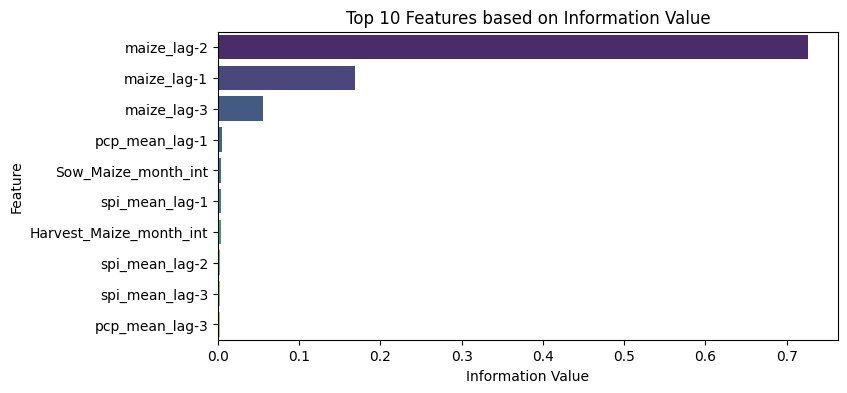

In [36]:
# Assuming you want to plot the top 10 features
top_features = feature_importance.head(10)

#Remove future warning


# Plot the features
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Features based on Information Value')
plt.xlabel('Information Value')
plt.ylabel('Feature')
plt.show()

#### 2. Partial Dependence plots

In [50]:
features = ['maize_lag-1', 'maize_lag-2', 'pcp_mean_lag-1',"spi_mean_lag-1", 'Sow_Maize_month_int']

y= df['Y_maize_major']

X = df[features]
X = X.apply(pd.to_numeric, errors='coerce')

gbr_model = GradientBoostingRegressor(random_state=2021).fit(X, y)


###### Y-maize major - lagged by one and two years

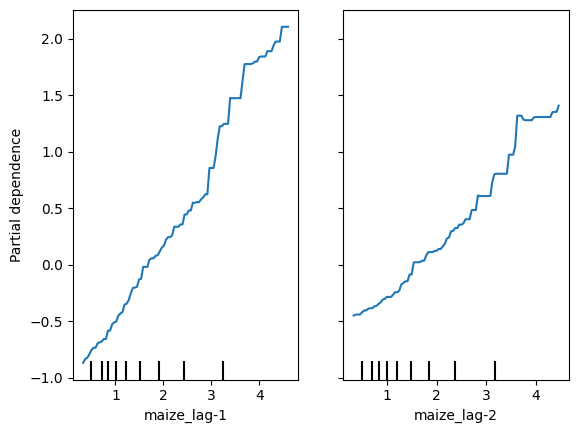

In [61]:

fig, ax = plt.subplots()
tree_disp = PartialDependenceDisplay.from_estimator(gbr_model, X, features=['maize_lag-1', 'maize_lag-2'], ax=ax)

- Lag-1 has slightly higher impact, but both lag1 nad lag2 are very important

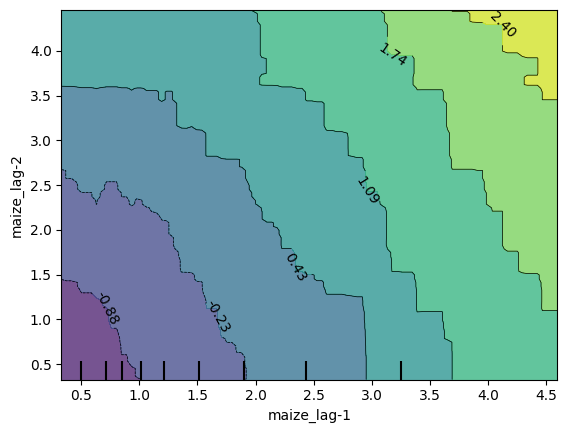

In [66]:
fig, ax = plt.subplots()
tree_disp = PartialDependenceDisplay.from_estimator(gbr_model, X, features=[['maize_lag-1', 'maize_lag-2']], ax=ax)

##### When adding percipitation, we can see a small effect in left part of X axis, however the impact of maize-lag-1 is much bigger

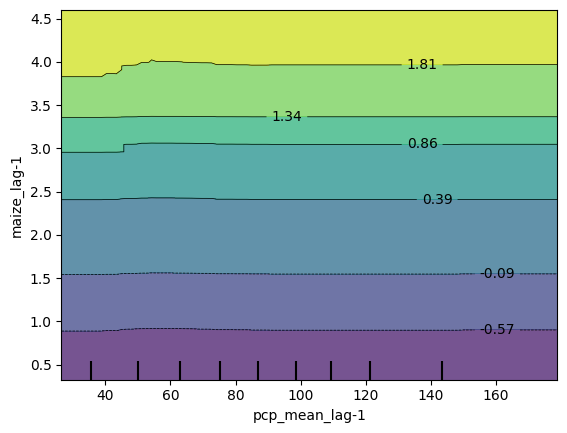

In [65]:
fig, ax = plt.subplots()
tree_disp = PartialDependenceDisplay.from_estimator(gbr_model,X,[['pcp_mean_lag-1', 'maize_lag-1']], ax=ax)



##### Combination of SPI index and Sow month
-## to give explanation

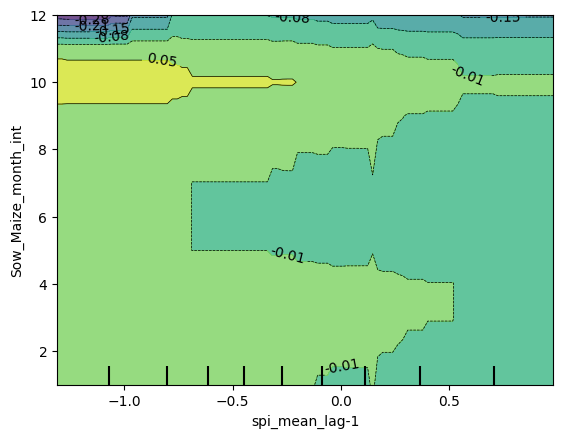

In [68]:

fig, ax = plt.subplots()
tree_disp = PartialDependenceDisplay.from_estimator(gbr_model, X, features=[["spi_mean_lag-1", 'Sow_Maize_month_int']], ax=ax)

### 3. LIME (local intepretation)